In [112]:
import pandas as pd
import numpy as np
import re
import string
import csv
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def clean(restaurant):
    filename = "{}.csv".format(restaurant)
    df = pd.read_csv(filename)

    df = df.drop("Unnamed: 0",1)
    #df = df.drop("Category", 1)
    df.columns = ["Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df["Restaurant"] = list(np.repeat(restaurant, len(df), axis=0))
    cols = ["Restaurant", "Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df = df[cols]
    cleaned_name = "Cleaned-{}".format(filename)
    #df.to_csv(cleaned_name)
    return df #.head()

In [3]:
#clean('pandaexpress')

In [4]:
#clean('hardees')

In [5]:
#clean('fiveguys')

In [6]:
#clean("Wendys")

In [7]:
#clean("Subway")

In [8]:
#clean("KFC")

In [9]:
#clean("Arbys")

In [10]:
#clean("Chipotle")

In [11]:
#clean("dunkin-donuts")

In [12]:
#clean("Papa-Johns")

In [13]:
#clean("pizza-hut")

In [14]:
#clean("Taco-bell")

In [15]:
def clean1(restaurant):
    filename = "{}.csv".format(restaurant)
    df = pd.read_csv(filename)

    df = df.drop("Unnamed: 0",1)
    #df = df.drop("Category", 1)
    df.columns = ["Category", "Items", "Calories", "Sodium (mg)", "Carbs (g)", "Sugars (g)", "Protein (g)"]
    df["Restaurant"] = list(np.repeat(restaurant, len(df), axis=0))
    cols = ["Restaurant", "Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df = df[cols]
    cleaned_name = "Cleaned-{}".format(filename)
    #df.to_csv(cleaned_name)
    return df #.head()

In [16]:
#clean1("Popeyes")

In [17]:
#clean1("Mcdonalds")

In [18]:
#clean1("Burger-king")

In [19]:
def clean_jack(restaurant):
    filename = "{}.csv".format(restaurant)
    df = pd.read_csv(filename)

    df = df.drop("Unnamed: 0",1)
    df = df.drop("Fiber (g)",1)
    #df = df.drop("Category", 1)
    df.columns = ["Category", "Items", "Calories", "Carbs (g)", "Sugars (g)", "Protein (g)"]
    df["Sodium (mg)"] = list(np.repeat(np.nan, len(df), axis=0))
    df["Restaurant"] = list(np.repeat(restaurant, len(df), axis=0))
    cols = ["Restaurant", "Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df = df[cols]
    cleaned_name = "Cleaned-{}".format(filename)
    #df.to_csv(cleaned_name)
    return df #.head()

In [20]:
#clean_jack("jack-in-the-box")

In [21]:
def clean_chick(restaurant):
    filename = "{}.csv".format(restaurant)
    df = pd.read_csv(filename)

    df = df.drop("Unnamed: 0",1)
    df = df.drop("Total Fat (g)",1)
    #df = df.drop("Category", 1)
    df.columns = ["Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)"]
    df["Sugars (g)"] = list(np.repeat(np.nan, len(df), axis=0))
    df["Restaurant"] = list(np.repeat(restaurant, len(df), axis=0))
    cols = ["Restaurant", "Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df = df[cols]
    cleaned_name = "Cleaned-{}".format(filename)
    #df.to_csv(cleaned_name)
    return df #.head()

In [22]:
#clean_chick("chick-fil-a")

In [23]:
def clean_dominos(restaurant):
    filename = "{}.csv".format(restaurant)
    df = pd.read_csv(filename)

    df = df.drop("Unnamed: 0",1)
    #df = df.drop("Category", 1)
    df.columns = ["Category", "Items", "Calories", "Sodium (mg)", "Carbs (g)", "Protein (g)"]
    df["Sugars (g)"] = list(np.repeat(np.nan, len(df), axis=0))
    df["Restaurant"] = list(np.repeat(restaurant, len(df), axis=0))
    cols = ["Restaurant", "Category", "Items", "Calories", "Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]
    df = df[cols]
    cleaned_name = "Cleaned-{}".format(filename)
    #df.to_csv(cleaned_name)
    return df #.head()

In [24]:
# aggregate all items to one dataset

def agg(restaurants):
    Item = pd.DataFrame()
    for rest in restaurants:
        if (rest=="dominos-pizza"):
            rest_df = clean_dominos(rest)
            frames = [Item, rest_df]
            Item = pd.concat(frames)
        elif (rest=="chick-fil-a"):
            rest_df = clean_chick(rest)
            frames = [Item, rest_df]
            Item = pd.concat(frames)
        elif (rest=="jack-in-the-box"):
            rest_df = clean_jack(rest)
            frames = [Item, rest_df]
            Item = pd.concat(frames)
        elif (rest in ["Popeyes", "Mcdonalds", "Burger-king"]):
            rest_df = clean1(rest)
            frames = [Item, rest_df]
            Item = pd.concat(frames)
        else:
            rest_df = clean(rest)
            frames = [Item, rest_df]
            Item = pd.concat(frames)
    Item = Item.reset_index(drop=True)
    return Item

In [25]:
item = agg(["Popeyes", "Mcdonalds", "Burger-king", "chick-fil-a", "jack-in-the-box",
    "Wendys", "Subway", "KFC", "Arbys", "dunkin-donuts", "Papa-Johns", "pizza-hut", "Taco-Bell", "panda-express", "hardees", "five-guys"])

In [26]:
# remove "Back to Top" at the end of some categories
cat = []
for string in item.Category:
    string = string.lower()
    cat.append(re.sub('back to top$', '', string))
    
item.Category = cat

# remove noise substring
for index,row in item.iterrows():
    if 'eval(ez_write_tag' in row['Items']:
        item.loc[index, 'Items'] = row['Items'].split('eval(ez_write_tag', 1)[0]
        
# remove noise substring "DO NOT USE"
for index,row in item.iterrows():
    if 'DO NOT USE ' in row['Items']:
        item.loc[index, 'Items'] = row['Items'].split('DO NOT USE ', 1)[0]

In [27]:
# exclude kid items on menu
kid = []
for string in item.Category:
    kid.append("kid" not in string)
item = item[kid]

# exclude toppings
top = []
for string in item.Category:
    top.append("toppoings" not in string)
item = item[top]

# exclude sauces
sau = []
for string in item.Category:
    sau.append("sauce" not in string)
item = item[sau]

item = item[item.Category!='additional options']

item = item[item.Category!='condiments']

item = item.reset_index(drop = True)

In [28]:
# imputate NA's with average
item['Sugars (g)'].fillna((item['Sugars (g)'].mean()), inplace=True)
item['Sodium (mg)'].fillna((item['Sodium (mg)'].mean()), inplace=True)

In [29]:
item.head()

,Restaurant,Category,Items,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,chicken,Wing,210,13,8,610.0,0.0
1,Popeyes,chicken,Leg,160,14,5,460.0,0.0
2,Popeyes,chicken,Thigh,280,14,7,640.0,0.0
3,Popeyes,chicken,Breast,440,35,16,1330.0,0.0
4,Popeyes,chicken,Wing,210,13,8,410.0,1.0


In [30]:
# remove special formats/symbols and lowercase all names
item_rest = []
for name in item.Restaurant:
    name = re.sub("[^0-9A-Za-z]","",name).lower()
    item_rest.append(name)
    
item.Restaurant = item_rest

In [31]:
item.head()

,Restaurant,Category,Items,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,popeyes,chicken,Wing,210,13,8,610.0,0.0
1,popeyes,chicken,Leg,160,14,5,460.0,0.0
2,popeyes,chicken,Thigh,280,14,7,640.0,0.0
3,popeyes,chicken,Breast,440,35,16,1330.0,0.0
4,popeyes,chicken,Wing,210,13,8,410.0,1.0


In [32]:
len(item)

3193

In [33]:
item.to_csv("all_item.csv", index = True)

# Clean georgaphic dataset

In [34]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

//anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [35]:
fast_restaurants = pd.read_csv("FastFoodRestaurants.csv")

In [36]:
fast_restaurants = fast_restaurants.drop(["keys", "websites", "country"],1)

In [37]:
fast_restaurants.head()

,address,city,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [38]:
# The top 50 fast food restaurants with most locations
pd.DataFrame(fast_restaurants.name.value_counts()[:20])

,name
McDonald's,1886
Burger King,1154
Taco Bell,873
Wendy's,731
Arby's,518
KFC,421
Domino's Pizza,345
Subway,322
SONIC Drive In,226
Hardee's,192


In [39]:
rest_list = ["Popeyes", "Mcdonalds", "Burger-king", "chick-fil-a", "jack-in-the-box",
    "Wendys", "Subway", "KFC", "Arbys", "dunkin-donuts", "Papa-Johns", "pizza-hut", "Taco-bell", "panda", "hardees", "fiveguys"]

# lowercase above list and remove special symbols

for i in np.arange(len(rest_list)):
    rest_list[i] = re.sub("[^0-9A-Za-z ]","",rest_list[i]).lower()

# remove special formats/symbols and lowercase all names
name_list = []
for name in fast_restaurants.name:
    name = re.sub("[^0-9A-Za-z]","",name).lower()
    name_list.append(name)
    
fast_restaurants.name = name_list

In [40]:
# Extract desired restaurants from big list

def find_rest(restsList, threshold):
    rests = pd.DataFrame()
    name_list = [name for name in fast_restaurants.name]
    for rest in restsList:
        boo_list = []
        for name in name_list:
            boo = fuzz.partial_ratio(rest, name)>threshold
            boo_list.append(boo)
        df = fast_restaurants[boo_list]
        frames = [rests, df]
        rests = pd.concat(frames).reset_index(drop=True)
    return rests

In [41]:
restaurants = find_rest(rest_list, 85)

In [42]:
restaurants.head()

,address,city,latitude,longitude,name,postalCode,province
0,1625 Veterans Pkwy,Jeffersonville,38.329670,-85.749380,popeyeslouisianakitchen,47130,IN
1,4337 Robinson St,Jackson,32.300626,-90.258128,popeyeschickenbiscuits,39209,AL
2,4725 Clinton Blvd,Jackson,32.328147,-90.251587,popeyeschickenbiscuits,39209,AL
3,9541 Highway 5,Douglasville,33.723988,-84.762820,popeyeslouisianakitchen,30135-1511,GA
4,4815 Clio Rd,Flint,43.058200,-83.733400,popeyeschickenbiscuits,48504,MI


In [43]:
# We found the number of unique value in restaurants name does not match (as shown below)
# need more cleaning

print(len(set(restaurants.name)))
#set(restaurants.name)

48


{'arbys',
 'arbysantigo',
 'burgerking',
 'burgerkingsalou',
 'chickfila',
 'chickfilamagnoliamall',
 'chickfilaorangeavenue',
 'chickfilasuperstitionspringscenter',
 'chickfilatruettsluau',
 'dunkindonuts',
 'fiveguys',
 'flashfoodsmcdonalds',
 'hamburgerking',
 'hardees',
 'hardeesredburrito',
 'hardeesredburritodoughboys',
 'jackinthebox',
 'kfc',
 'kfcaw',
 'kfckentuckyfriedchicken',
 'kfctacobell',
 'mcdonalds',
 'mcdonalds25557',
 'mcdonaldsofmililanimauka',
 'mcdonaldsoldatlanta',
 'mcdonaldswalmart',
 'panda',
 'pandaexpress',
 'papajohns',
 'papajohnspizza',
 'pizzahut',
 'pizzahutwingstreet',
 'popeyes',
 'popeyeschicken',
 'popeyeschickenandbiscuits',
 'popeyeschickenbiscuits',
 'popeyeslouisianakitchen',
 'subway',
 'subwaybellsferry',
 'subwaycitgoofquarryville',
 'subwayguitars',
 'subwayjohnsonjonesboro',
 'subwayrolandpark',
 'subwaysandwiches',
 'subwaysandwichesandsalads',
 'tacobell',
 'tacobellpizzahutexpress',
 'wendys'}

In [44]:
# remove "hamburger king"
restaurants = restaurants[restaurants.name != "hamburgerking"]

# remove "ninospizza"
restaurants = restaurants[restaurants.name != "ninospizza"]

restaurants = restaurants.reset_index(drop = True)

In [45]:
# There is one restaurant 'flashfoodsmcdonalds' we cant replace this name with another by not messing up other entries. We will have to manually
# rename this entry to 'mcdonalds' .
index = restaurants[restaurants.name == 'flashfoodsmcdonalds'].index
restaurants.at[index[0],'name'] = 'mcdonalds'

In [46]:
# Unify all restaurants' name
# chop off substrings

clean_name_list=[]
for name in restaurants.name:
    for rest in rest_list:
        if (name.startswith(rest)):
            clean_name_list.append(rest)

In [47]:
restaurants.name = clean_name_list

In [48]:
# Unify province abbrviation: "Co Spgs" to "CO"
print(set(restaurants.province))
indexnames = restaurants[restaurants.province == "Co Spgs"].index
restaurants.at[indexnames,'province'] = 'CO'

{'WA', 'UT', 'CO', 'MN', 'OR', 'FL', 'NJ', 'VA', 'AL', 'OH', 'AR', 'NC', 'LA', 'DC', 'MA', 'TN', 'RI', 'PA', 'DE', 'TX', 'MD', 'VT', 'OK', 'NH', 'SD', 'ND', 'MS', 'IN', 'GA', 'NE', 'Co Spgs', 'WV', 'AK', 'WY', 'CA', 'NY', 'ID', 'IL', 'WI', 'HI', 'MO', 'ME', 'CT', 'SC', 'MT', 'IA', 'KY', 'MI', 'NM', 'AZ', 'KS', 'NV'}


In [49]:
restaurants.to_csv("restaurants.csv", index = False)

In [50]:
restaurants.head()

,address,city,latitude,longitude,name,postalCode,province
0,1625 Veterans Pkwy,Jeffersonville,38.329670,-85.749380,popeyes,47130,IN
1,4337 Robinson St,Jackson,32.300626,-90.258128,popeyes,39209,AL
2,4725 Clinton Blvd,Jackson,32.328147,-90.251587,popeyes,39209,AL
3,9541 Highway 5,Douglasville,33.723988,-84.762820,popeyes,30135-1511,GA
4,4815 Clio Rd,Flint,43.058200,-83.733400,popeyes,48504,MI


In [51]:
restaurants.loc[[5294, 5555, 5619]]

,address,city,latitude,longitude,name,postalCode,province
5294,501 S 8th St,Rogers,36.329530,-94.12543,arbys,72756,AR
5555,1111 Lincoln Way East,Massillon,40.799400,-81.51110,arbys,44647,OH
5619,2000 South Ave 3 E,Yuma,32.691148,-114.58268,arbys,85365,AZ


# Health data cleaning, combine state obesity and diabetes

In [363]:
# read in obesity data
obesity = pd.read_csv("Obesity.csv")

In [345]:
# only keep state abbr, state name, and adult obesity rate 
obesity = pd.DataFrame(obesity[["LocationAbbr", "LocationDesc", "Data_Value"]])
obesity.columns = ["abbr", "location", "obesity"]

In [346]:
# drop na's
obesity = obesity.dropna()

# only keep all states
indexnames = obesity[(obesity.abbr == "GU") | (obesity.abbr == "PR") | (obesity.abbr == "VI")].index
obesity = obesity.drop(indexnames)

# convert obesity into numberic
obesity['obesity'] = pd.to_numeric(obesity['obesity'])

In [347]:
obesity.head()

,abbr,location,obesity
0,US,National,30.9
1,AL,Alabama,36.2
2,AK,Alaska,29.5
3,AZ,Arizona,29.5
4,AR,Arkansas,37.1


######

In [354]:
# read in diabetes data
diab = pd.read_csv("Diabetes.csv")

In [358]:
diab.head()

,State,Percentage,Lower Limit,Upper Limit
0,National,9.5,9.1,10.0
1,Alabama,13.2,12.2,14.2
2,Alaska,7.7,6.5,9.2
3,Arizona,9.7,9.0,10.5
4,Arkansas,12.1,10.8,13.5


In [359]:
# rename the first row as "National"
diab.at[0,"State"] = "National"

In [360]:
# only keep states
indexnames = diab[(diab.State == "Guam") | (diab.State == "Puerto Rico") | (diab.State == "Virgin Islands of the U.S.")].index
diab = diab.drop(indexnames)

# column bind percentage of adult diabetes to obesity dataset
obesity["diabetes"] = diab.Percentage

In [361]:
# rename dataset to "state_health", drop the first row of national average
state_health = obesity
state_health = state_health.drop(0)

# sort dataframe by state abbr
state_health = state_health.sort_values(by=['abbr']).reset_index(drop = True)

In [362]:
state_health.head()

,abbr,location,obesity,diabetes
0,AK,Alaska,29.5,7.7
1,AL,Alabama,36.2,13.2
2,AR,Arkansas,37.1,12.1
3,AZ,Arizona,29.5,9.7
4,CA,California,25.8,9.7


In [59]:
state_health.to_csv("state_health.csv", index = False)

<IPython.core.display.Javascript object>


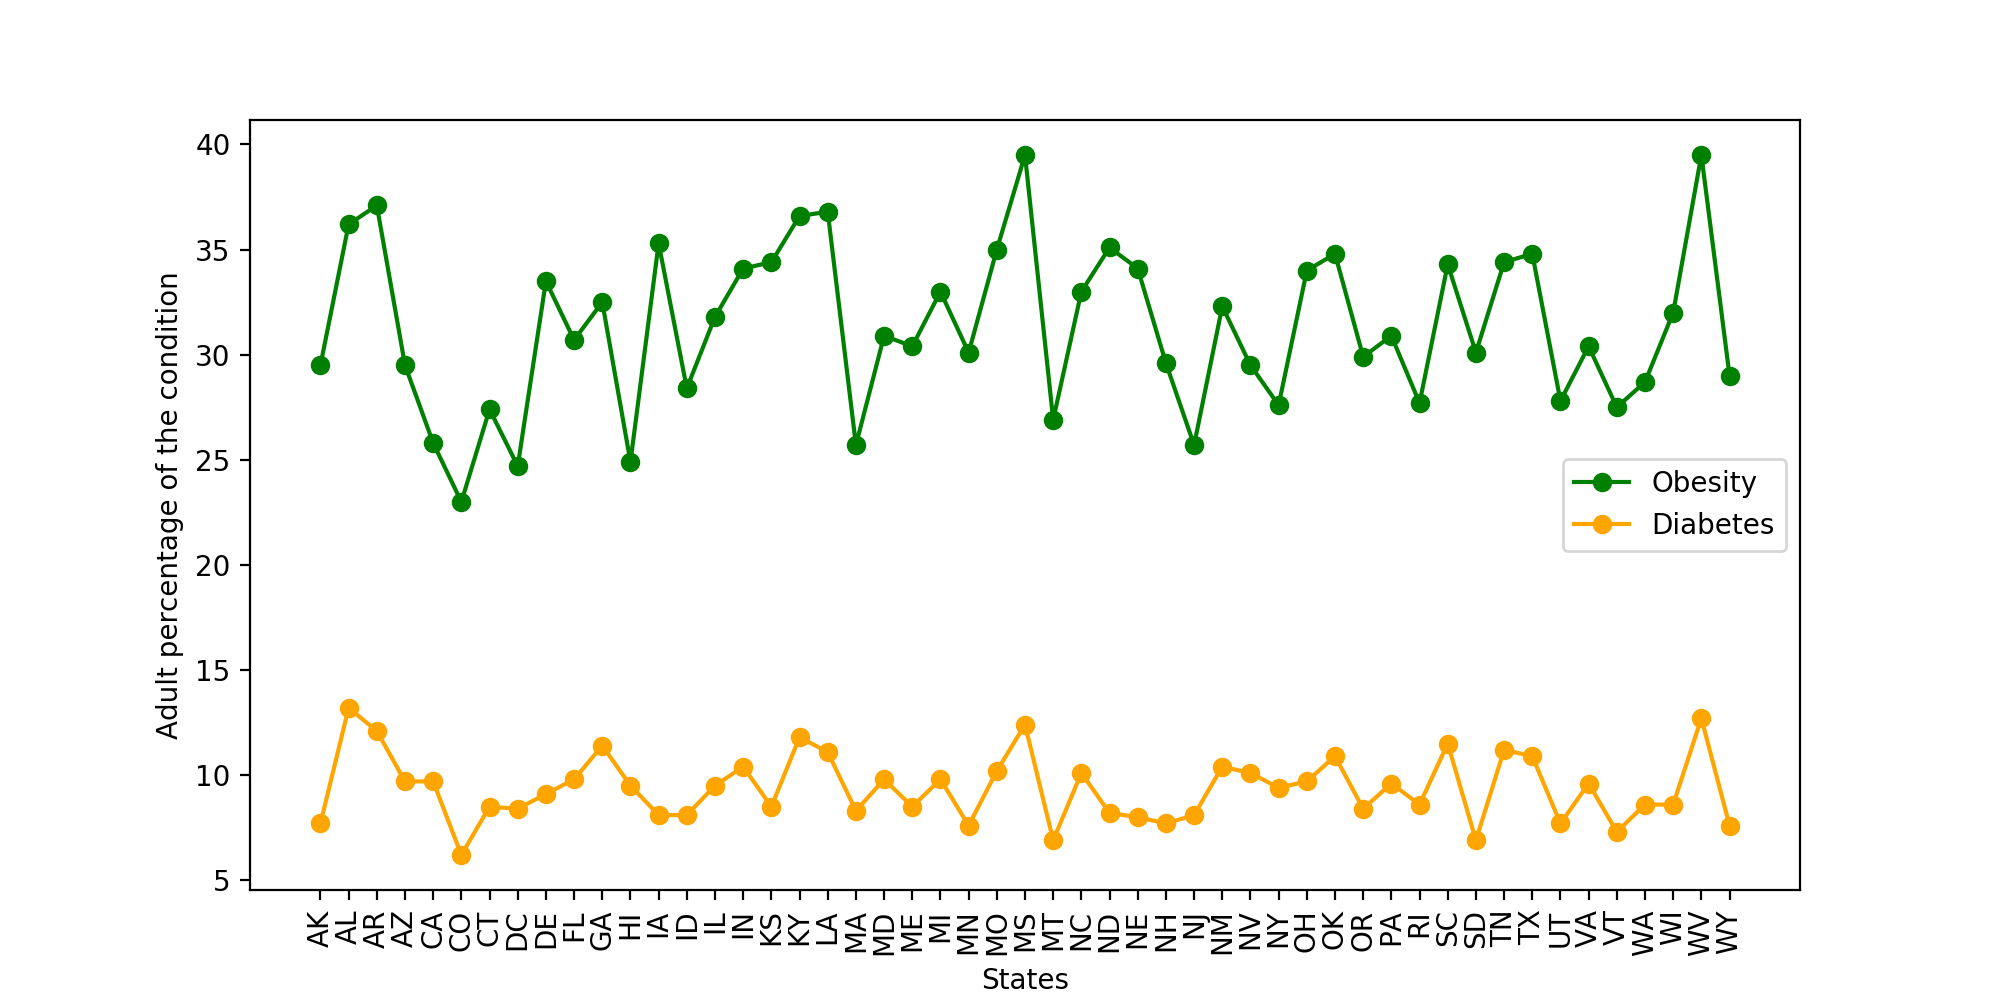

In [254]:
states = np.arange(51)
fig_obs_dia = plt.figure(figsize=(10,5))
plt.plot(states, state_health.obesity, "-o", color='g')
plt.plot(states, state_health.diabetes, "-o", color='orange')
plt.xlabel('States')
plt.ylabel('Adult percentage of the condition')
plt.legend(("Obesity", "Diabetes"))
plt.xticks(states, state_health.abbr, fontsize = 10, rotation = 90)
plt.show()

In [255]:
fig_obs_dia.savefig("Obesity-Diabetes-Overview.jpg")

# Combine number of restaurant with state_health

In [61]:
state_health_rests = pd.read_csv("state_health.csv")
rests = pd.read_csv("restaurants.csv")

In [62]:
# aggreate number of fast food restaurants per state
counts = pd.DataFrame(rests.province.value_counts())
counts = counts.sort_index()

# bind counts to state_health
state_health_rests['n_of_rests'] = list(counts.province)

In [63]:
state_health_rests.head()

,abbr,location,obesity,diabetes,n_of_rests
0,AK,Alaska,29.5,7.7,10
1,AL,Alabama,36.2,13.2,184
2,AR,Arkansas,37.1,12.1,99
3,AZ,Arizona,29.5,9.7,142
4,CA,California,25.8,9.7,460


In [64]:
state_health_rests = state_health_rests.reset_index(drop = True)
state_health_rests.to_csv("state_health_rests.csv", index = False)

# Fit data to simple linear regression model

In [65]:
from sklearn.linear_model import LinearRegression

Fit data to regression model (x = number of restaurants)

In [289]:
X = state_health_rests['n_of_rests'].values.reshape(-1,1)
y = state_health_rests['obesity'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.031624525151457306

<IPython.core.display.Javascript object>


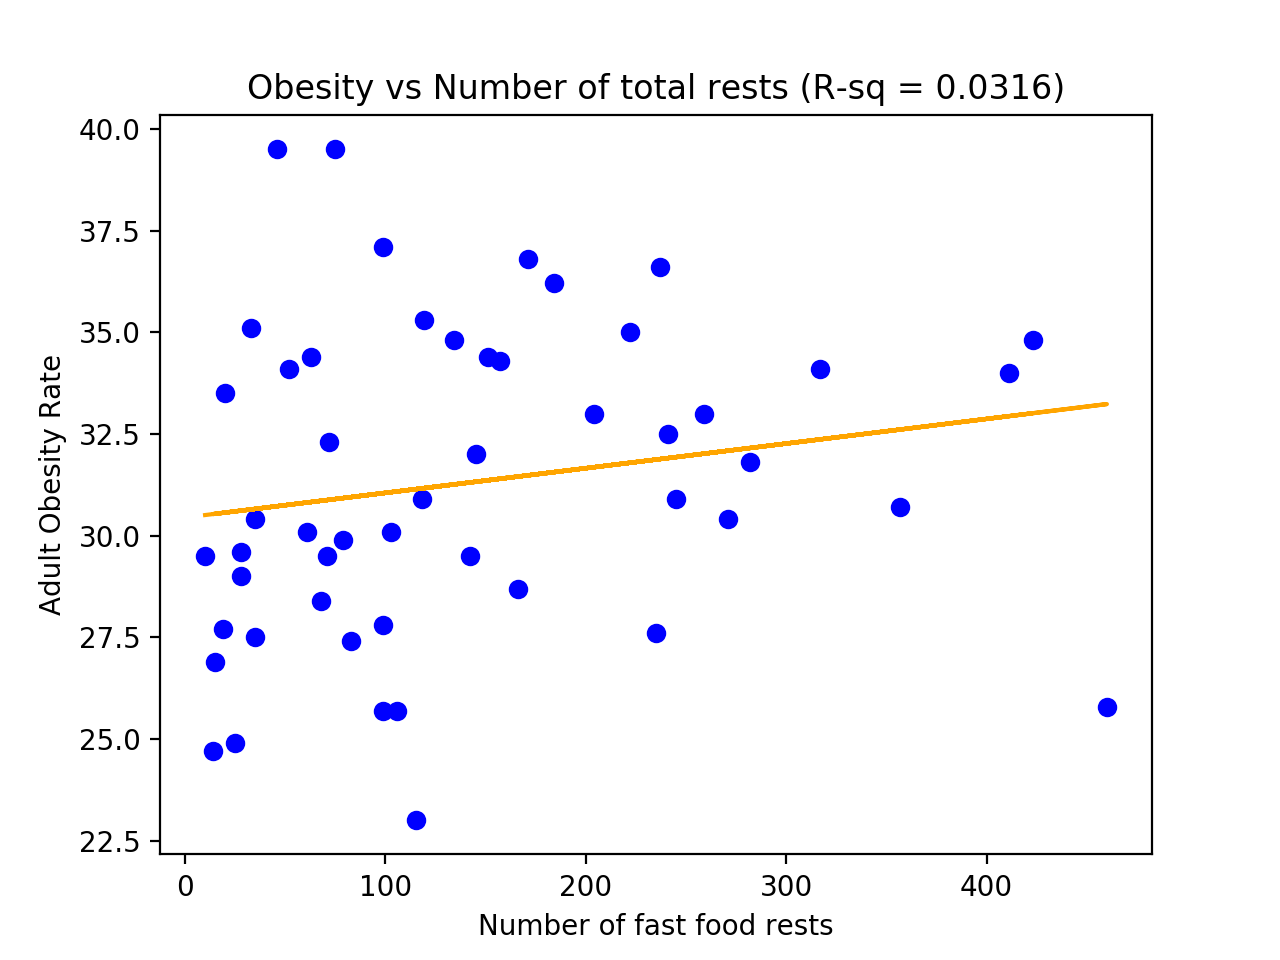

In [290]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Obesity vs Number of total rests (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Number of fast food rests")
plt.ylabel("Adult Obesity Rate")
plt.show()

In [291]:
fig.savefig("Obesity-rests.jpg")

In [292]:
X = state_health_rests['n_of_rests'].values.reshape(-1,1)
y = state_health_rests['diabetes'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.1528720795416636

<IPython.core.display.Javascript object>


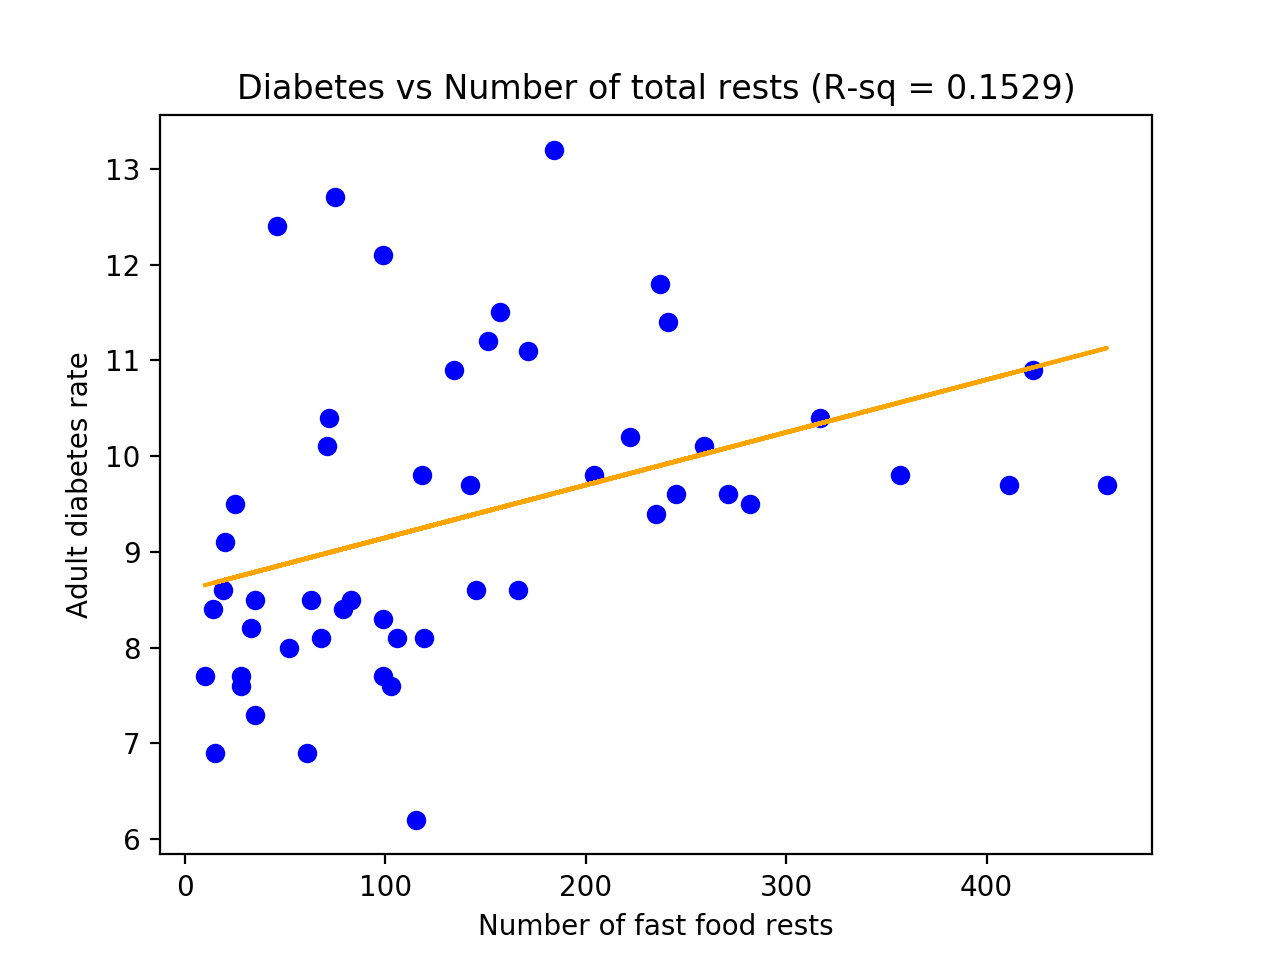

In [293]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Diabetes vs Number of total rests (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Number of fast food rests")
plt.ylabel("Adult diabetes rate")
plt.show()

In [294]:
fig.savefig("Diabetes-rests.jpg")

Construct per capita dataset (final dataset)

In [70]:
data = pd.read_csv("population.csv")

In [71]:
data = data[['NAME', 'POPESTIMATE2018']]

In [168]:
#data.head()

In [73]:
data = data.drop(data.head(5).index)

In [74]:
data = data.drop(data.tail(1).index)

In [75]:
data = data.reset_index(drop = True)

In [167]:
#state_health_rests.head()

In [77]:
health_capita = pd.merge(state_health_rests, data, left_on = 'location', right_on = 'NAME', how = 'left')

In [78]:
# remove duplicate name column
health_capita = health_capita.drop(['NAME', 'location'], axis=1)

In [79]:
# rename column names
health_capita.columns = ['state', 'obesity', 'diabetes', 'n_of_rests', 'population(10K)']

# convert population in grands
health_capita['population(10K)'] = health_capita['population(10K)']//10000

In [80]:
# construct restaurants per capita
health_capita['per_capita'] = health_capita['n_of_rests']/health_capita['population(10K)']

In [81]:
health_capita.head()

,state,obesity,diabetes,n_of_rests,population(10K),per_capita
0,AK,29.5,7.7,10,73,0.136986
1,AL,36.2,13.2,184,488,0.377049
2,AR,37.1,12.1,99,301,0.328904
3,AZ,29.5,9.7,142,717,0.198047
4,CA,25.8,9.7,460,3955,0.116308


Fit data to regression model (x = restaurants per capita)

In [335]:
X = health_capita['per_capita'].values.reshape(-1,1)
y = health_capita['obesity'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.12000960210362131

<IPython.core.display.Javascript object>


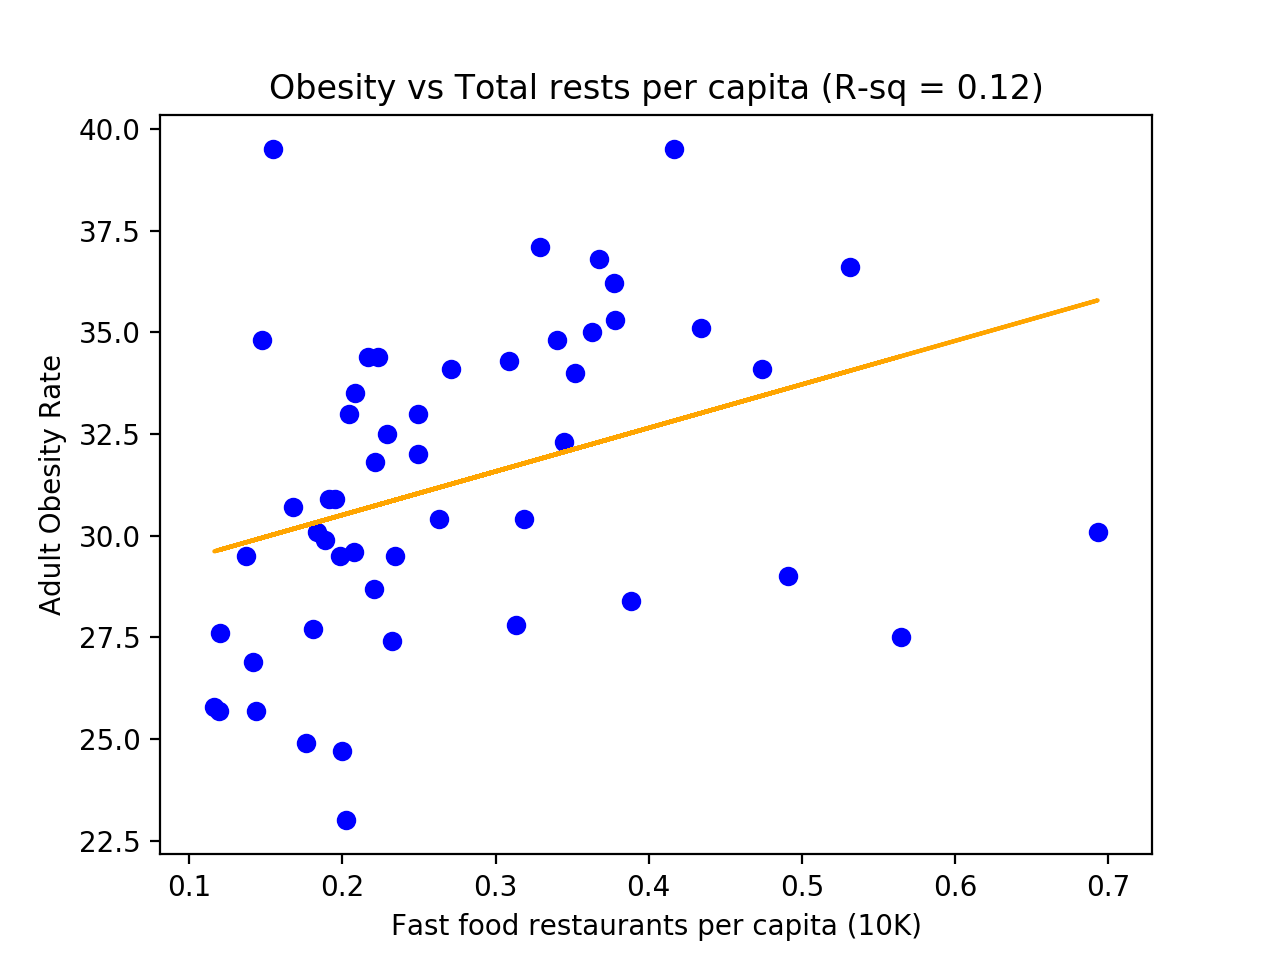

In [336]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Obesity vs Total rests per capita (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Fast food restaurants per capita (10K)")
plt.ylabel("Adult Obesity Rate")
plt.show()

In [337]:
fig.savefig("Obesity-capita.jpg")

In [331]:
X = health_capita['per_capita'].values.reshape(-1,1)
y = health_capita['diabetes'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.0034759246564181057

<IPython.core.display.Javascript object>


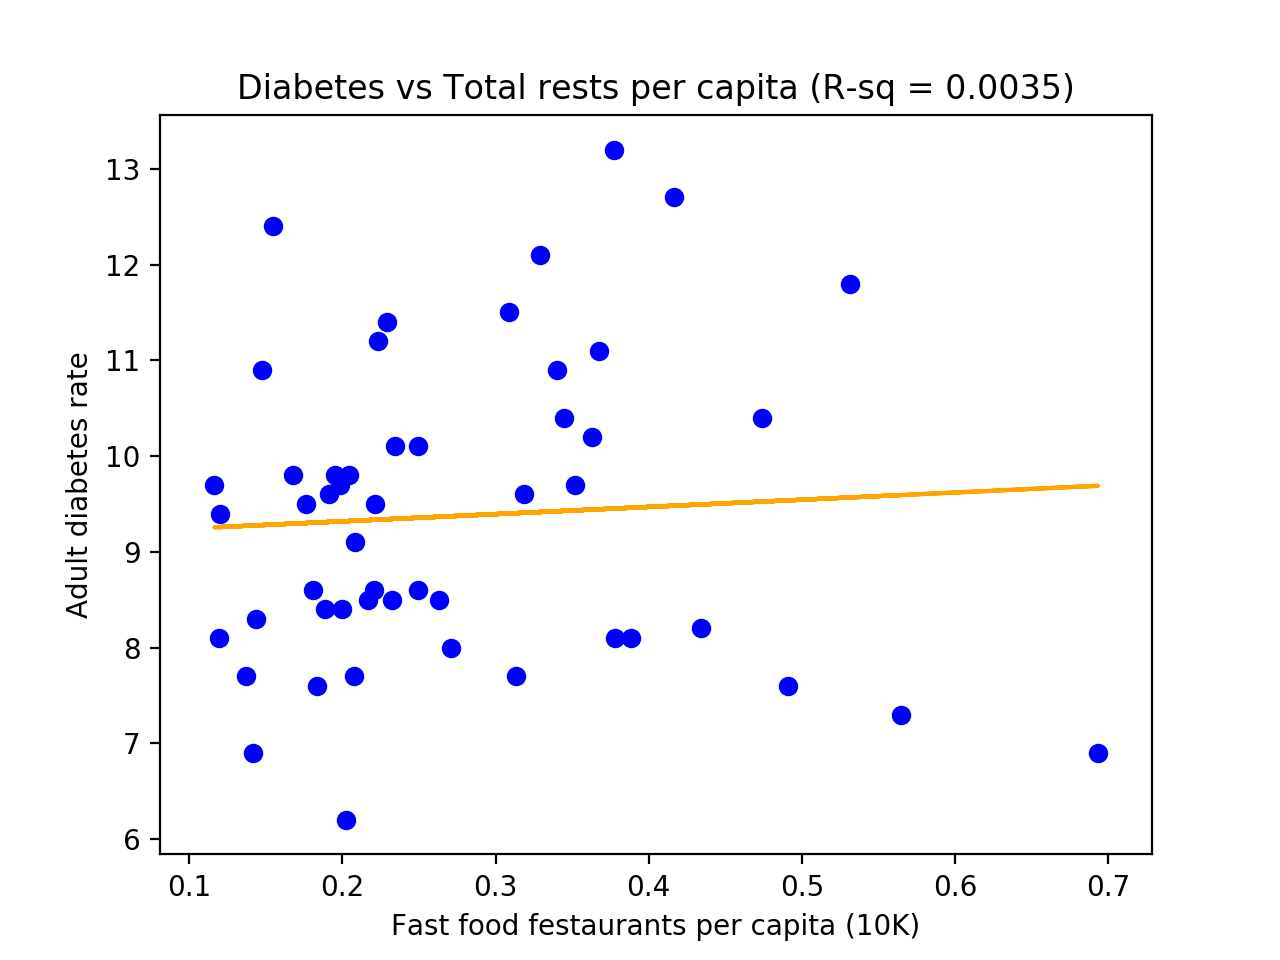

In [332]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Diabetes vs Total rests per capita (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Fast food festaurants per capita (10K)")
plt.ylabel("Adult diabetes rate")
plt.show()

In [333]:
fig.savefig("Diabetes-capita.jpg")

<IPython.core.display.Javascript object>


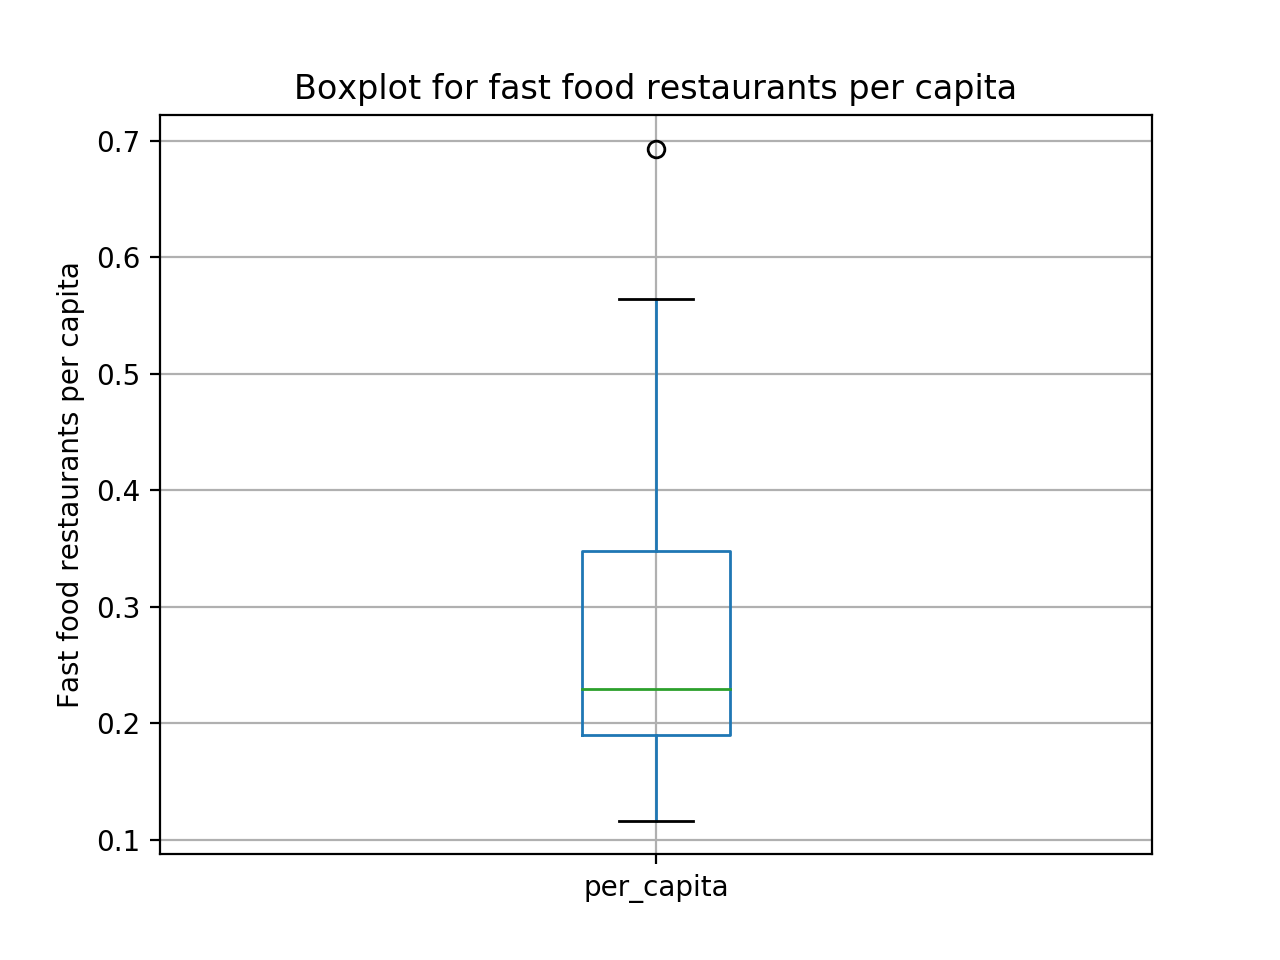

In [230]:
# detect outliers
fig = plt.figure()
boxplot1 = health_capita.boxplot(column = ['per_capita'])
plt.title("Boxplot for fast food restaurants per capita")
plt.ylabel("Fast food restaurants per capita")
plt.show()

In [231]:
fig.savefig("Detect-outliers.jpg")

In [87]:
# function to remove outliers
def reject_outliers(data):
    u = np.mean(data['per_capita'])
    s = np.std(data['per_capita'])
    data_filtered = data[(data['per_capita']>(u-2*s)) & (data['per_capita']<(u+2*s))]
    return data_filtered

Fit data to regression model (x = restaurants per capita, exclude outliers)

In [338]:
X = reject_outliers(health_capita)['per_capita'].values.reshape(-1,1)
y = reject_outliers(health_capita)['obesity'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.2379172695213514

<IPython.core.display.Javascript object>


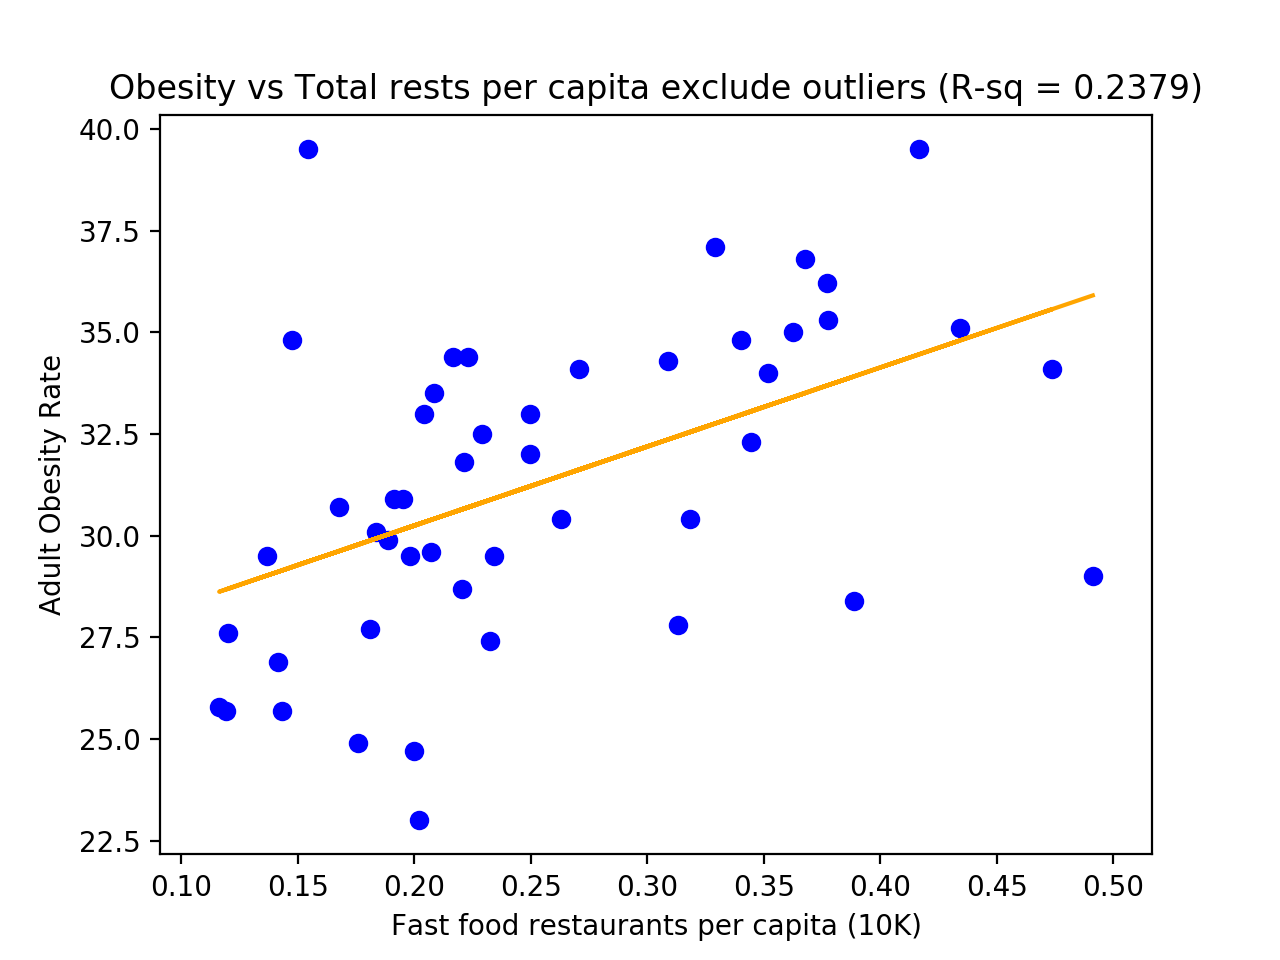

In [339]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Obesity vs Total rests per capita exclude outliers (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Fast food restaurants per capita (10K)")
plt.ylabel("Adult Obesity Rate")
plt.show()

In [340]:
fig.savefig("Obesity-capita-noOutliers.jpg")

In [326]:
X = reject_outliers(health_capita)['per_capita'].values.reshape(-1,1)
y = reject_outliers(health_capita)['diabetes'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.05394159349005245

<IPython.core.display.Javascript object>


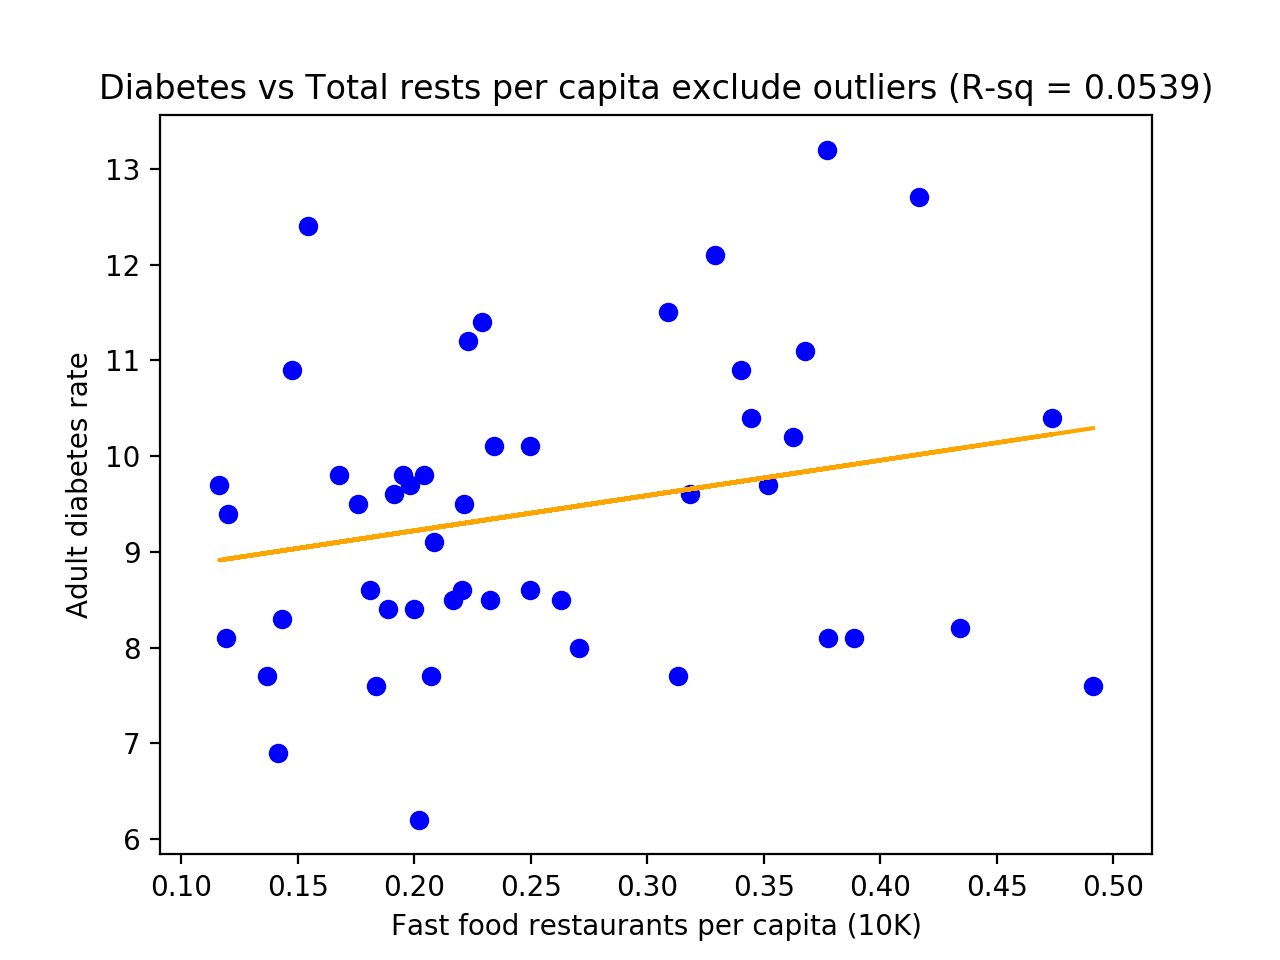

In [327]:
fig = plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Diabetes vs Total rests per capita exclude outliers (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("Fast food restaurants per capita (10K)")
plt.ylabel("Adult diabetes rate")
plt.show()

In [328]:
fig.savefig("Diabete-capita-noOutliers.jpg")

# Determine most effective nutritions to calories

In [92]:
from sklearn import linear_model

# Using multi-linear regression with 4 dimensions

In [93]:
# fit data to multi-linear regression with all nutritions
nutri = item[["Protein (g)", "Carbs (g)", "Sodium (mg)", "Sugars (g)"]]
cal = pd.DataFrame(item["Calories"])

In [94]:
X = nutri
y = cal

In [95]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [96]:
predictions = lm.predict(X)
lm.score(X,y)

0.814555207608813

In [368]:
# lm.coef_
# Protein and carbs have the most influence on calories
print("Calories = {}*Protein+{}*Carbs+{}*Sodium+{}*Sugar".format(round(lm.coef_[0][0],2), 
                                                                 round(lm.coef_[0][1],2), round(lm.coef_[0][2],2), round(lm.coef_[0][3],2)))

Calories = 5.41*Protein+3.79*Carbs+0.2*Sodium+0.61*Sugar


# Using multi-linear regression with 3 dimensions and visualize

In [205]:
nutri = item[["Protein (g)", "Carbs (g)", "Calories"]]
nutri.columns = ["Protein", "Carbs", "Calories"]

In [206]:
#nutri.head()

In [207]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [208]:
model = smf.ols(formula='Calories ~ Protein + Carbs', data=nutri)
results_formula = model.fit()
results_formula.params

Intercept     6.075877
Protein      11.542060
Carbs         4.607982
dtype: float64

In [209]:
x_surf, y_surf = np.meshgrid(np.linspace(nutri.Protein.min(), nutri.Protein.max(), 100),np.linspace(nutri.Carbs.min(), nutri.Carbs.max(), 100))
onlyX = pd.DataFrame({'Protein': x_surf.ravel(), 'Carbs': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

<IPython.core.display.Javascript object>


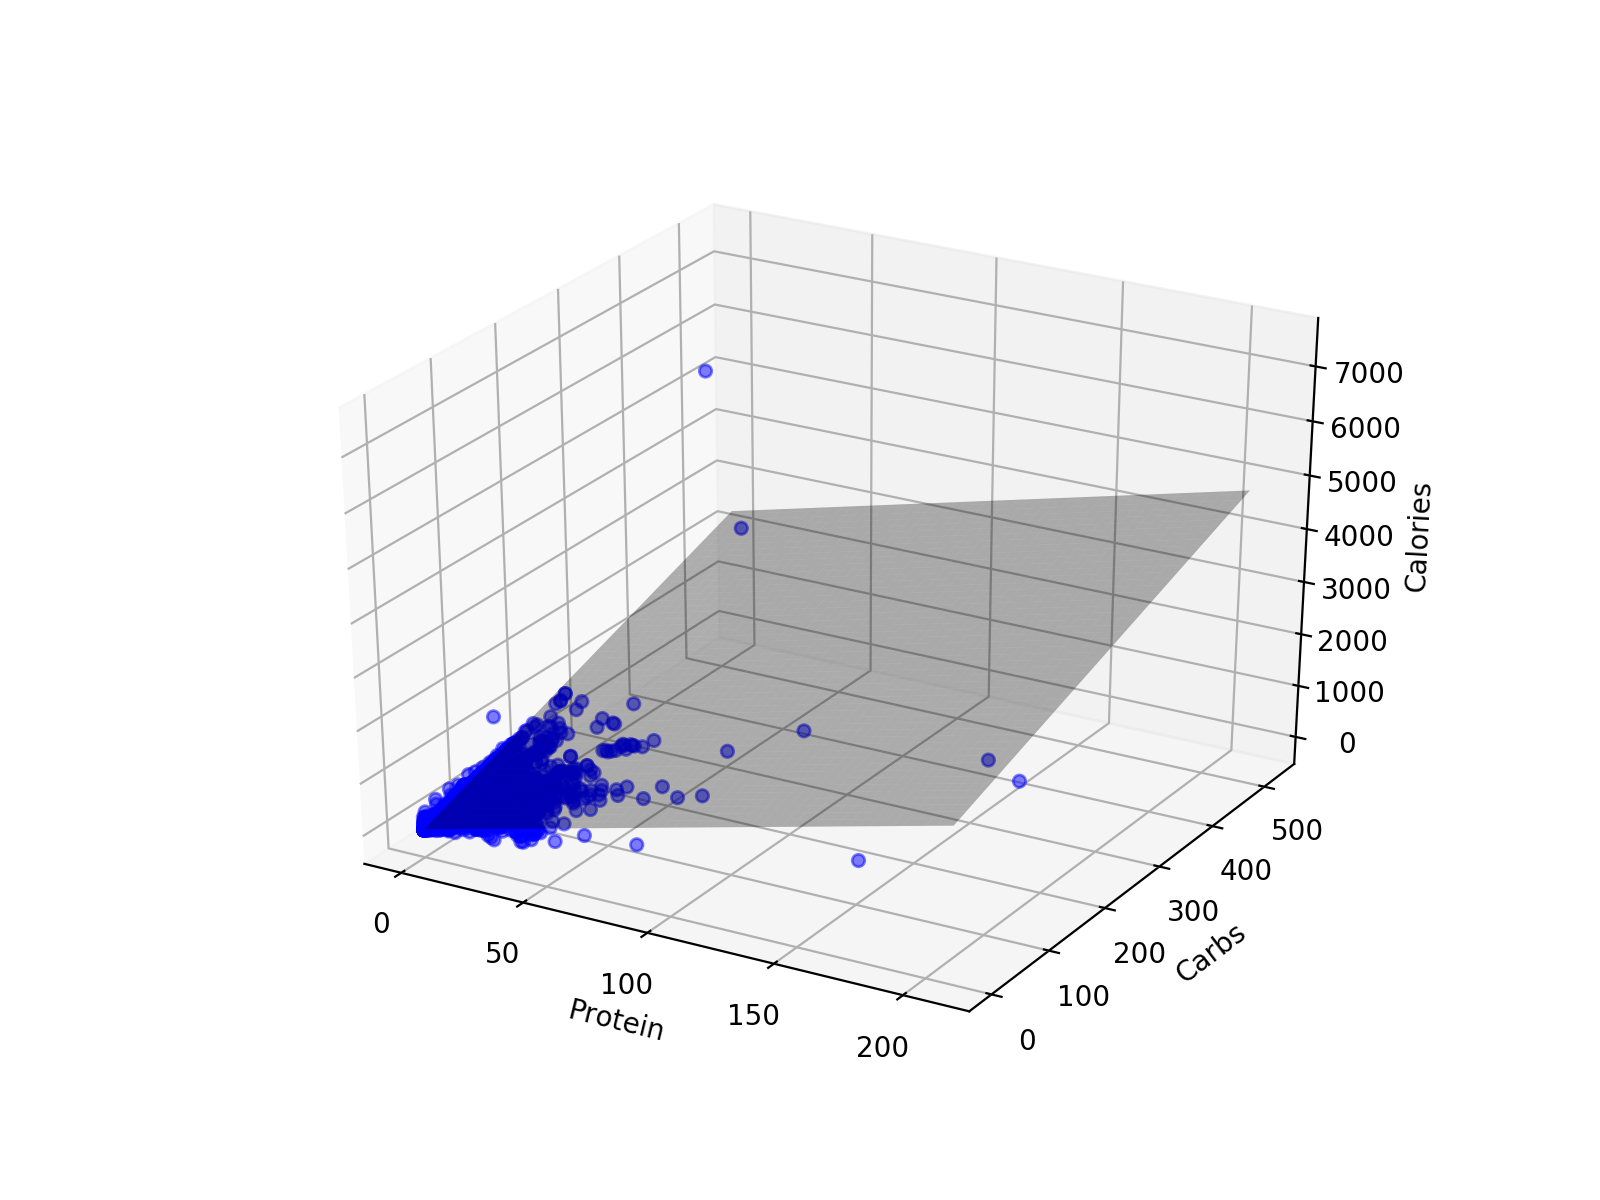

In [210]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nutri['Protein'],nutri['Carbs'],nutri['Calories'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='black', alpha=0.3)
ax.set_xlabel('Protein')
ax.set_ylabel('Carbs')
ax.set_zlabel('Calories')
plt.show()

In [211]:
fig.savefig("Multi-linear.jpg")

In [107]:
# function to remove outliers in calories
def reject_outliers_cal(data):
    u = np.mean(data['Calories'])
    s = np.std(data['Calories'])
    data_filtered = data[(data['Calories']>(u-2*s)) & (data['Calories']<(u+2*s))]
    return data_filtered

# function to remove outliers in carbs
def reject_outliers_car(data):
    u = np.mean(data['Carbs'])
    s = np.std(data['Carbs'])
    data_filtered = data[(data['Carbs']>(u-2*s)) & (data['Carbs']<(u+2*s))]
    return data_filtered

# function to remove outliers in protein
def reject_outliers_p(data):
    u = np.mean(data['Protein'])
    s = np.std(data['Protein'])
    data_filtered = data[(data['Protein']>(u-2*s)) & (data['Protein']<(u+2*s))]
    return data_filtered

In [246]:
# remove outlier
nutri = reject_outliers_car(reject_outliers_cal(reject_outliers_p(nutri)))

In [247]:
# fit data to multi-linear model again exclude outliers
model = smf.ols(formula='Calories ~ Protein + Carbs', data=nutri)
results_formula = model.fit()
print(results_formula.params)
print("R squared is", results_formula.rsquared)

Intercept    20.921631
Protein      10.701952
Carbs         4.306865
dtype: float64
R squared is 0.799415542487986


In [248]:
x_surf, y_surf = np.meshgrid(np.linspace(nutri.Protein.min(), nutri.Protein.max(), 100),np.linspace(nutri.Carbs.min(), nutri.Carbs.max(), 100))
onlyX = pd.DataFrame({'Protein': x_surf.ravel(), 'Carbs': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

<IPython.core.display.Javascript object>


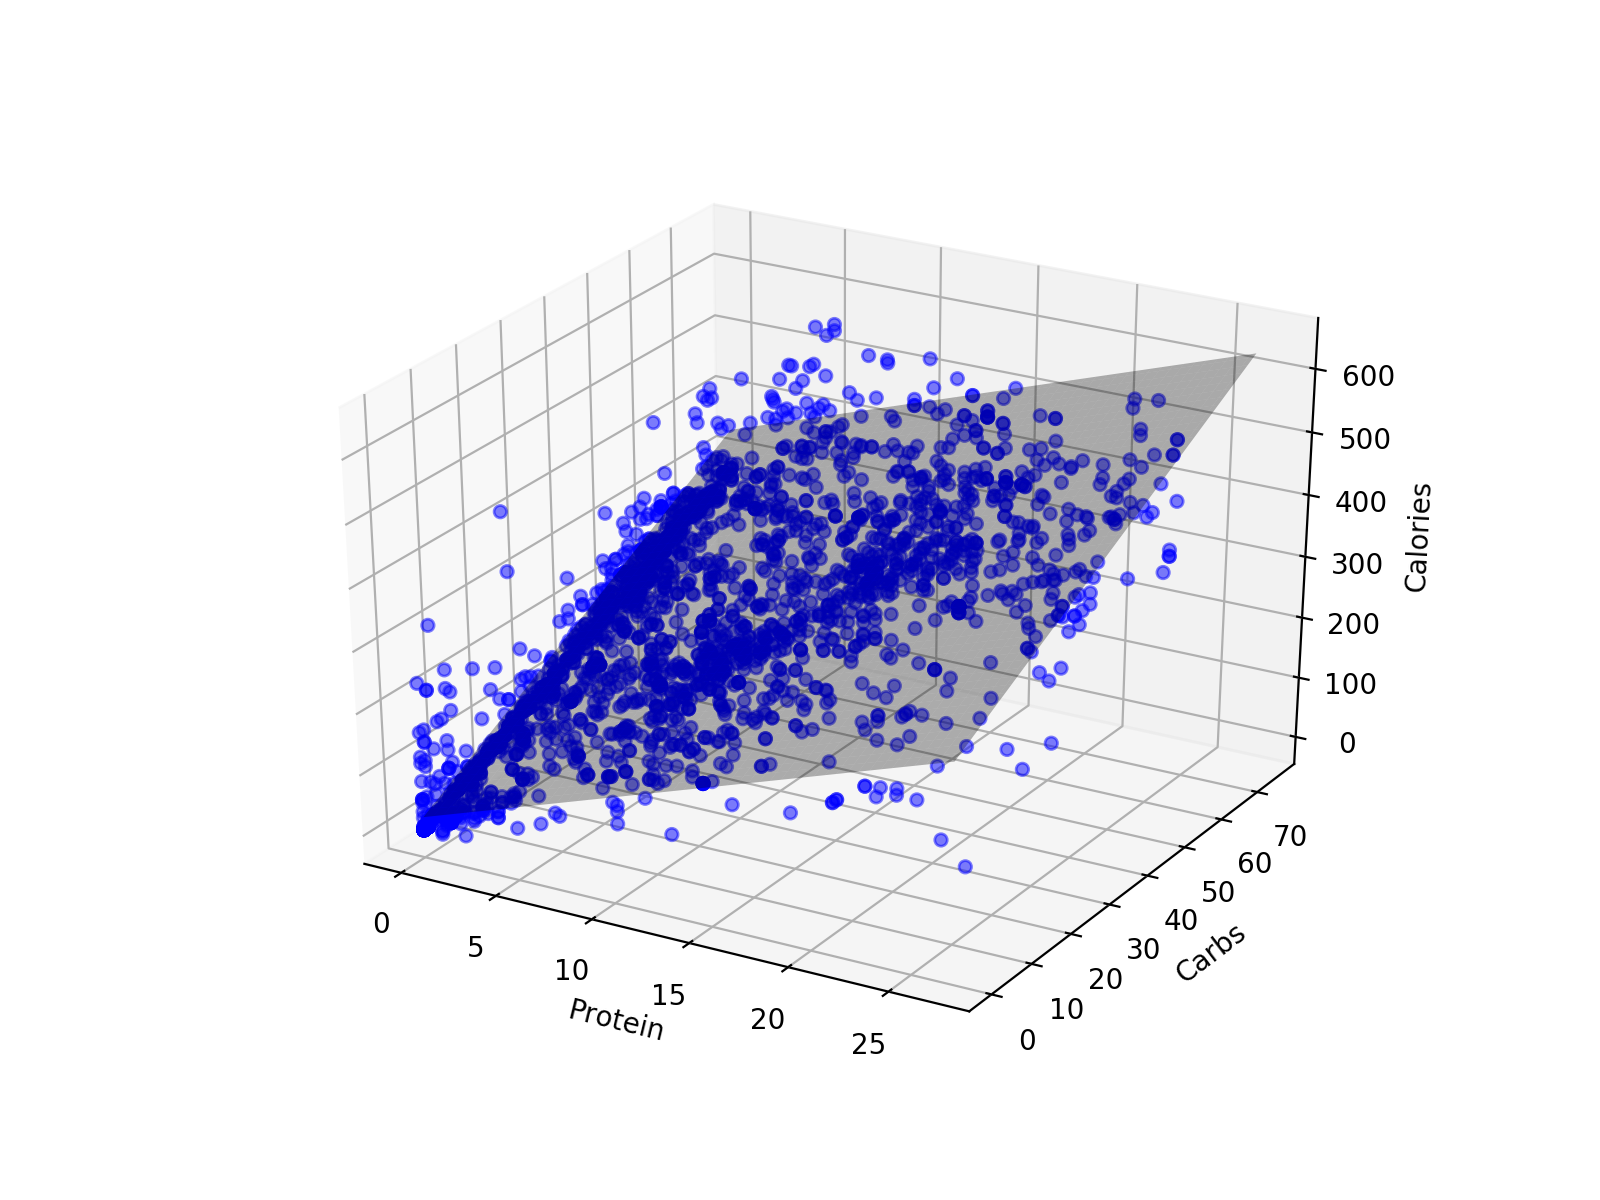

In [249]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nutri['Protein'],nutri['Carbs'],nutri['Calories'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='black', alpha=0.3)
ax.set_xlabel('Protein')
ax.set_ylabel('Carbs')
ax.set_zlabel('Calories')
plt.show()

In [250]:
fig.savefig("Multi-linear-noOutliers.jpg")

# Cluster restaurants

In [262]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [267]:
# evaluating number of clusters
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n).fit(rest_nutrition)
    preds = clusterer.predict(rest_nutrition)

    score = silhouette_score(rest_nutrition, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.4623061102636713)
For n_clusters = 3, silhouette score is 0.47608101877353254)
For n_clusters = 4, silhouette score is 0.31233017614764874)
For n_clusters = 5, silhouette score is 0.3184130063790759)
For n_clusters = 6, silhouette score is 0.301646960926967)
For n_clusters = 7, silhouette score is 0.38884339693773096)
For n_clusters = 8, silhouette score is 0.3226277314596878)
For n_clusters = 9, silhouette score is 0.2691614944364732)


<IPython.core.display.Javascript object>


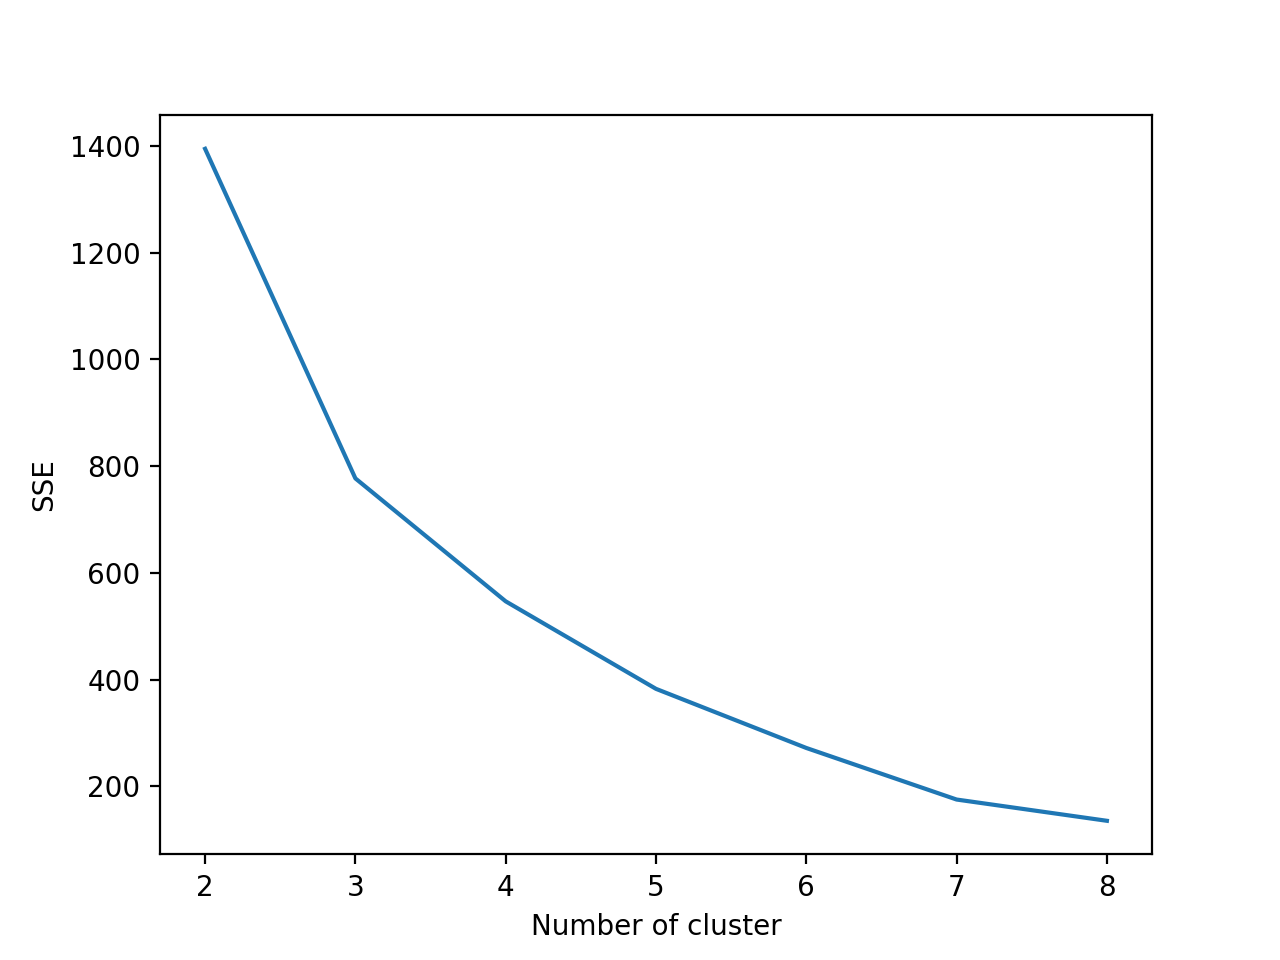

In [369]:
# elbow graph for different number of clusters
sse = {}
data = rest_nutrition
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [370]:
fig.savefig("Elbow_graph.jpg")

In [375]:
# calculating mean nutrition values and reduce calories and sodium, as calories can be represented fairly by protein and carbs
# sodium has little effect on obesity and diabetes
rest_nutrition = item.groupby('Restaurant').mean()
rest_nutrition = rest_nutrition.drop("Calories", axis = 1)
rest_nutrition = rest_nutrition.drop("Sodium (mg)", axis = 1)

In [376]:
Result=KMeans(n_clusters=3, verbose=1)
Result.fit(rest_nutrition)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 784.3009689565599
start iteration
done sorting
end inner loop
Iteration 1, inertia 784.3009689565599
center shift 0.000000e+00 within tolerance 5.905107e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 824.1031017577955
start iteration
done sorting
end inner loop
Iteration 1, inertia 824.1031017577955
center shift 0.000000e+00 within tolerance 5.905107e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1077.37412014461
start iteration
done sorting
end inner loop
Iteration 1, inertia 941.0580021631
start iteration
done sorting
end inner loop
Iteration 2, inertia 941.0580021631
center shift 0.000000e+00 within tolerance 5.905107e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1124.7963315995053
start iteration
done sorting
end inner loop
Iteration 1, inertia 1087.81926970

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [377]:
preds = Result.predict(rest_nutrition)
silhouette_score(rest_nutrition, preds, metric='euclidean')

0.4751595864424321

In [378]:
rest_nutrition["Cluster"] = list(Result.labels_)

In [379]:
cluster0 = rest_nutrition[rest_nutrition.Cluster == 0]

In [380]:
cluster1 = rest_nutrition[rest_nutrition.Cluster == 1]

In [381]:
cluster2 = rest_nutrition[rest_nutrition.Cluster == 2]

In [382]:
rest_nutrition

,Protein (g),Carbs (g),Sugars (g),Cluster
Restaurant,,,,
arbys,17.338889,43.705556,20.105556,1
burgerking,12.960227,47.818182,28.636364,1
chickfila,14.396825,41.444444,21.592971,1
dunkindonuts,6.371859,42.638191,30.604690,1
fiveguys,25.315789,55.842105,8.263158,2
hardees,18.787037,41.703704,6.611111,0
jackinthebox,12.381215,44.790055,24.834254,1
kfc,8.141104,35.141104,25.220859,1
mcdonalds,9.669388,38.693878,24.016327,1


<IPython.core.display.Javascript object>


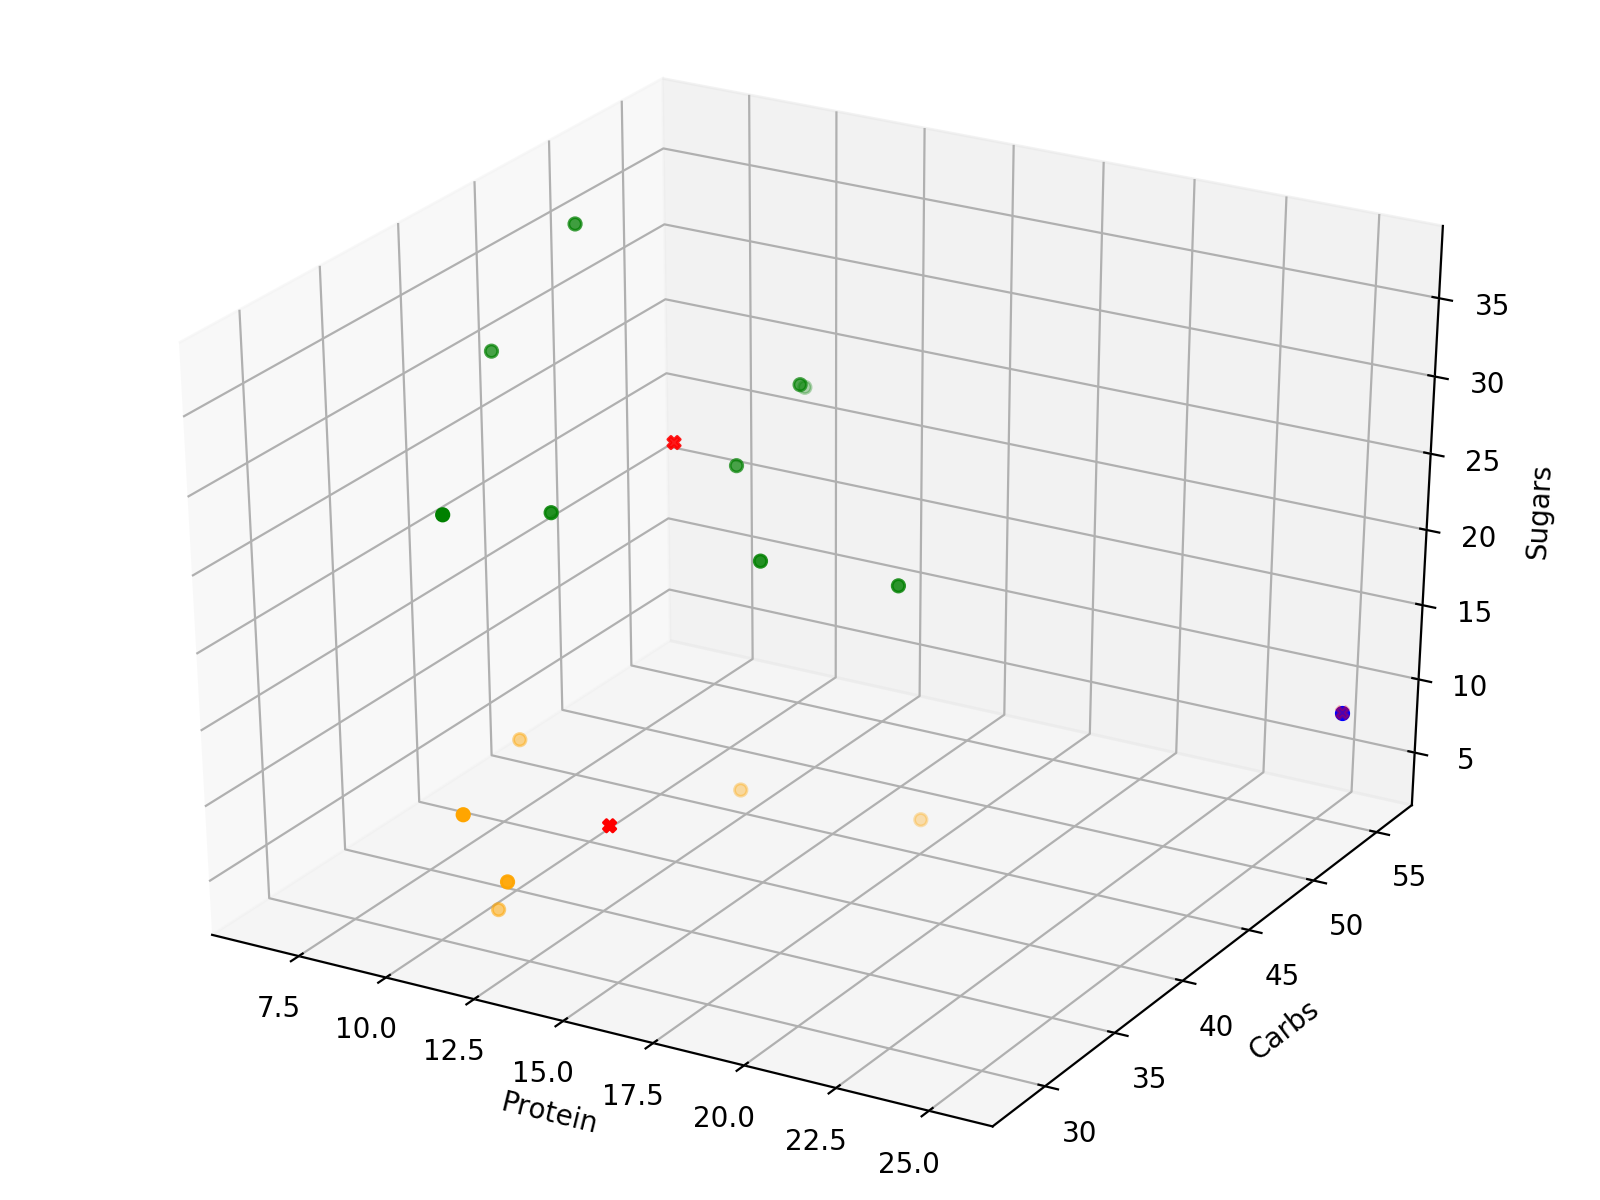

In [273]:
fig=plt.figure(figsize = (8,6))
ax=Axes3D(fig)
ax.scatter(cluster0["Protein (g)"], cluster0["Carbs (g)"], cluster0["Sugars (g)"],color='orange')
ax.scatter(cluster1["Protein (g)"], cluster1["Carbs (g)"], cluster1["Sugars (g)"],color='green')
ax.scatter(cluster2["Protein (g)"], cluster2["Carbs (g)"], cluster2["Sugars (g)"],color='blue')
centers = np.array(Result.cluster_centers_)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker="X", color='red')
ax.set_xlabel('Protein')
ax.set_ylabel('Carbs')
ax.set_zlabel('Sugars')
plt.show()

In [222]:
fig.savefig("Cluster_rests.jpg")

# Cautions! Please read!

In [155]:
############################################################################################
##################################          Caution          #########################################
############################################################################################
# extract "unhealthy" group (high on sugar low on protein), depend on what color appears on points at top of the graph
# if green, then use cluster1 in the following code
# if orange, then use cluster0 in the following code
# if blue, then use cluster2 in the following code
# for example this time, green came on top, then I used cluster1
# originally orange came on top, so I used orange as names for the following datasets. But that's not necessary always the case,
# orange is just a name

orange = restaurants.loc[restaurants.name.isin(cluster1.index)]

#orange.head()

In [156]:
# aggreate number of fast food restaurants per state
counts = pd.DataFrame(orange.province.value_counts())
counts = counts.sort_index()

# bind counts to state_health
state_health_rests['n_of_orange'] = list(counts.province)

state_health_rests = state_health_rests.reset_index(drop = True)
#state_health_rests.to_csv("state_health_rests.csv", index = False)

In [157]:
# construct orange capita
orange_capita = pd.merge(state_health_rests, data, left_on = 'location', right_on = 'NAME', how = 'left')

# remove duplicate name column
orange_capita = orange_capita.drop(['NAME', 'location'], axis=1)

# rename column names
orange_capita.columns = ['state', 'obesity', 'diabetes', 'n_of_rests', 'n_of_orange', 'population(10K)']

# convert population in grands
orange_capita['population(10K)'] = orange_capita['population(10K)']//10000

# construct restaurants per capita
orange_capita['orange_per_capita'] = orange_capita['n_of_orange']/orange_capita['population(10K)']

#orange_capita.head()

,state,obesity,diabetes,n_of_rests,n_of_orange,population(10K),orange_per_capita
0,AK,29.5,7.7,10,6,73,0.082192
1,AL,36.2,13.2,184,150,488,0.307377
2,AR,37.1,12.1,99,66,301,0.219269
3,AZ,29.5,9.7,142,100,717,0.139470
4,CA,25.8,9.7,460,356,3955,0.090013


# Fit orange data to simple linear model

In [158]:
# function to remove outliers
def reject_outliers_o(data):
    u = np.mean(data['orange_per_capita'])
    s = np.std(data['orange_per_capita'])
    data_filtered = data[(data['orange_per_capita']>(u-2*s)) & (data['orange_per_capita']<(u+2*s))]
    return data_filtered

In [318]:
X = reject_outliers_o(orange_capita)['orange_per_capita'].values.reshape(-1,1)
y = reject_outliers_o(orange_capita)['obesity'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.2900769548130776

<IPython.core.display.Javascript object>


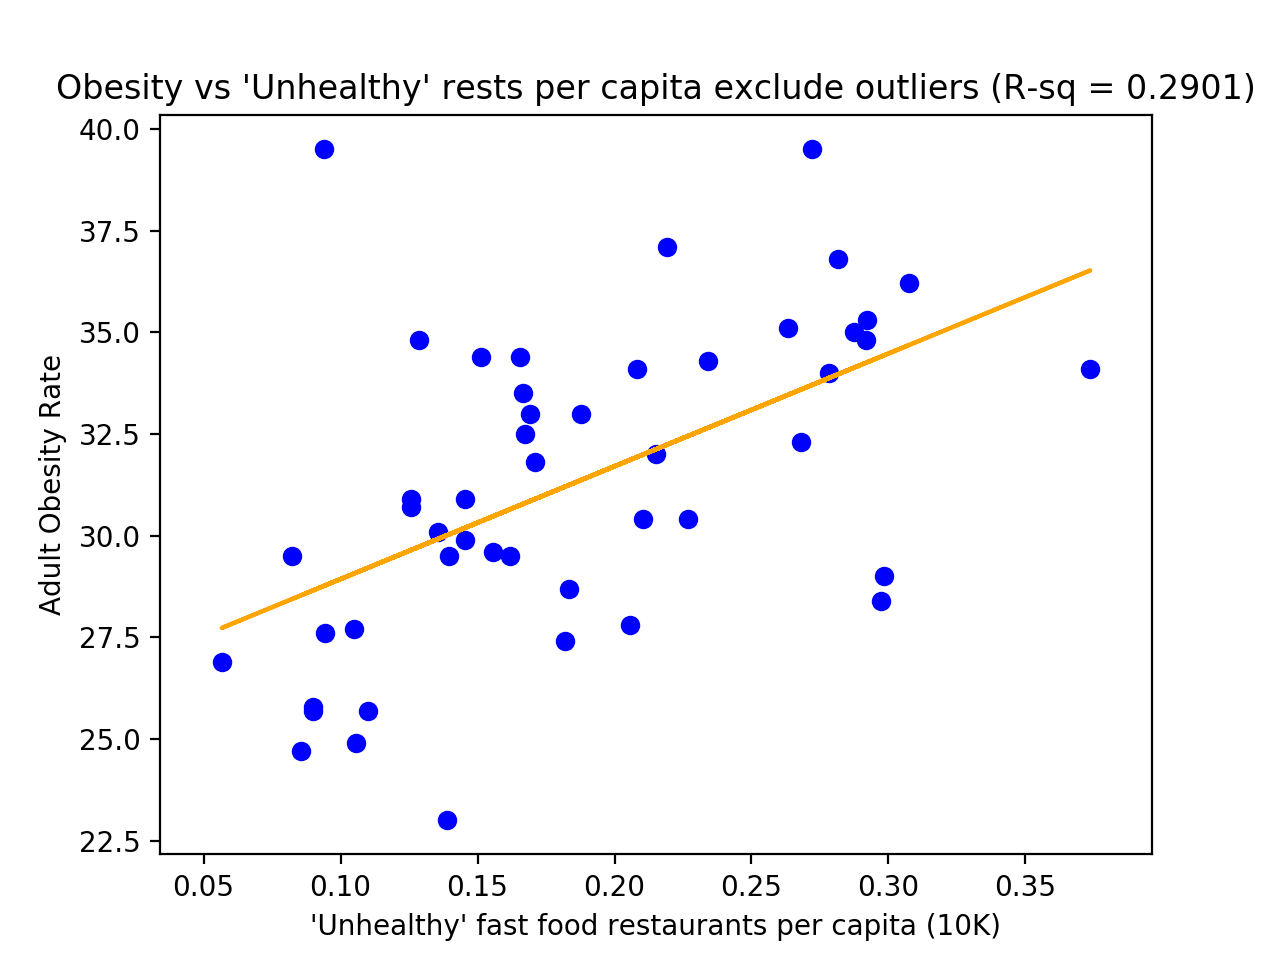

In [319]:
fig=plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Obesity vs 'Unhealthy' rests per capita exclude outliers (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("'Unhealthy' fast food restaurants per capita (10K)")
plt.ylabel("Adult Obesity Rate")
plt.show()

In [320]:
fig.savefig("Obesity-Unhealthy.jpg")

In [323]:
X = reject_outliers_o(orange_capita)['orange_per_capita'].values.reshape(-1,1)
y = reject_outliers_o(orange_capita)['diabetes'].values.reshape(-1,1)

lr = LinearRegression()
model = lr.fit(X,y)

preds = lr.predict(X)

lr.score(X,y)

0.08853283112032506

<IPython.core.display.Javascript object>


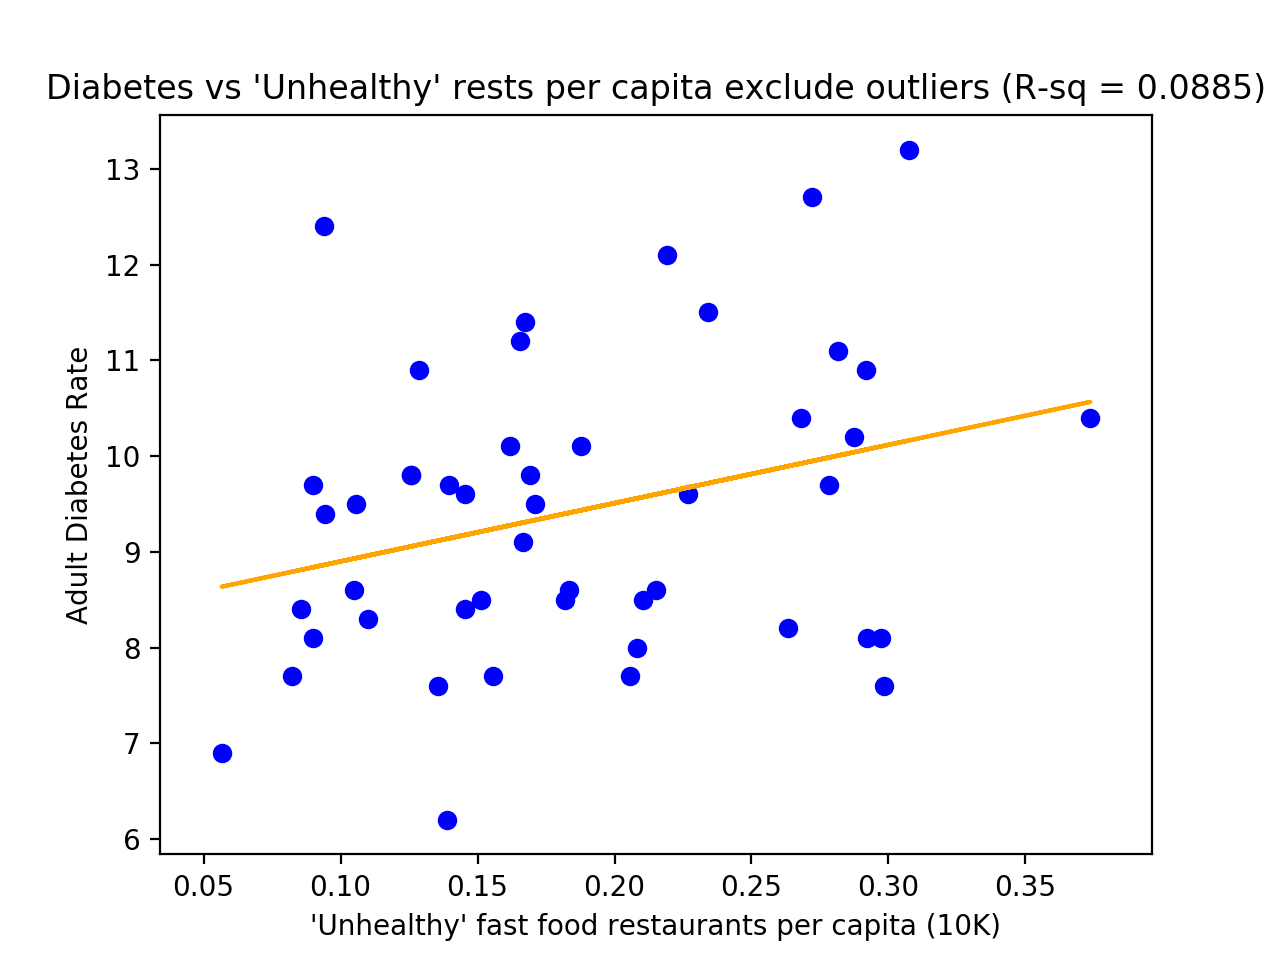

In [324]:
fig=plt.figure()
plt.scatter(X, y, color = "blue")
plt.plot(X, preds, color = "orange")
tit = "Diabetes vs 'Unhealthy' rests per capita exclude outliers (R-sq = {})".format(round(lr.score(X,y), 4))
plt.title(tit)
plt.xlabel("'Unhealthy' fast food restaurants per capita (10K)")
plt.ylabel("Adult Diabetes Rate")
plt.show()

In [325]:
fig.savefig("Diabetes-Unhealthy.jpg")